# **TRỰC QUAN HÓA DỮ LIỆU**

---

Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu từ file đã được tiền xử lý

In [2]:
df_clean = pd.read_csv('../Data/StudentPerformanceFactors_clean.csv')
df_clean.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Câu 1: Sự ảnh hưởng của hoạt động ngoại khóa lên thành tích học tập 

### Tiền xử lý
- Để trả lời câu hỏi này, nhóm sẽ nhóm thông tin về 2 cột điểm thi là  **Exam_Score** và **Previous_Scores** theo cột **Extracurricular_Activities** để tìm xem nhóm nào có điểm cao hơn.

In [16]:
finalExam_extraActivity_data = df_clean.loc[df_clean['Extracurricular_Activities'] == 'Yes', 'Exam_Score']
preExam_extraActivity_data = df_clean.loc[df_clean['Extracurricular_Activities'] == 'No', 'Exam_Score']

### Trực quan hóa

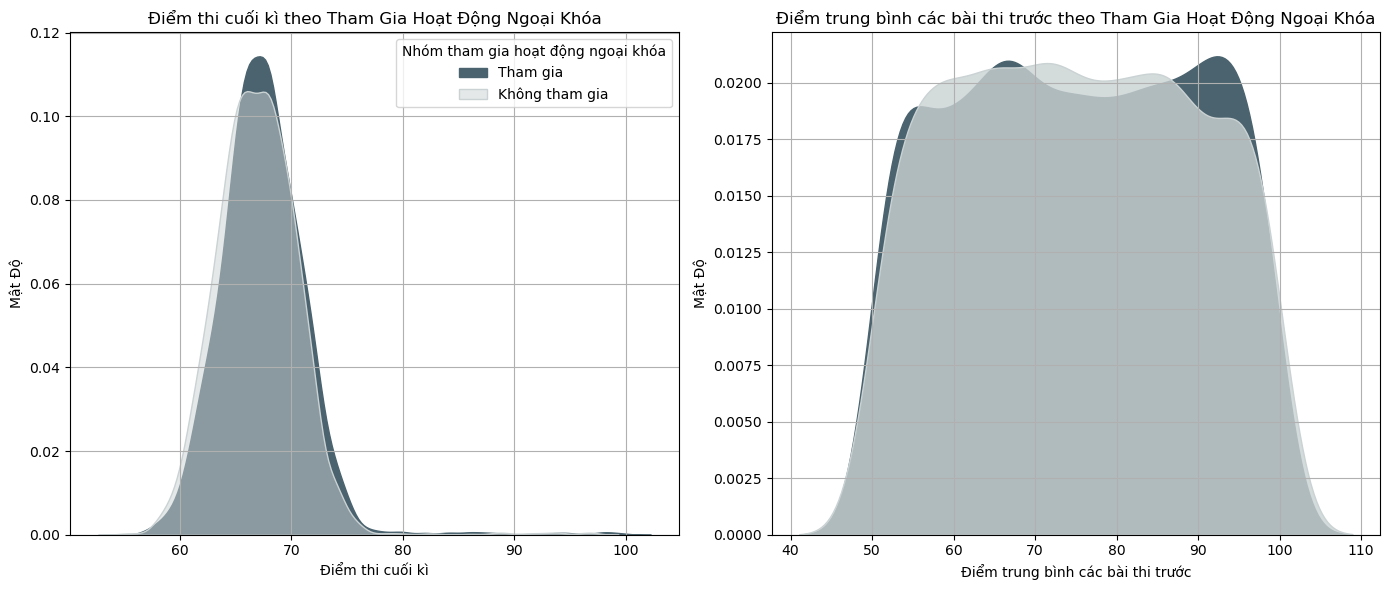

In [17]:
# Vẽ biểu đồ KDE cho từng nhóm
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.kdeplot(finalExam_extraActivity_data, label='Tham gia', color='#4A636E', fill=True, alpha=1, ax=axes[0])
sns.kdeplot(preExam_extraActivity_data, label='Không tham gia', color='#CAD2D3', fill=True, alpha=0.5, ax= axes[0])

axes[0].set_title('Điểm thi cuối kì theo Tham Gia Hoạt Động Ngoại Khóa')
axes[0].set_xlabel('Điểm thi cuối kì')
axes[0].set_ylabel('Mật Độ')
axes[0].legend(title='Nhóm tham gia hoạt động ngoại khóa')
axes[0].grid()

sns.kdeplot(df_clean.loc[df_clean['Extracurricular_Activities'] == 'Yes', 'Previous_Scores'], 
             label='Tham gia', color='#4A636E', fill=True, alpha=1, ax=axes[1])  # Màu sáng
sns.kdeplot(df_clean.loc[df_clean['Extracurricular_Activities'] == 'No', 'Previous_Scores'], 
             label='Không tham gia', color='#CAD2D3', fill=True, alpha=0.8, ax=axes[1])  # Màu cam đậm

axes[1].set_title('Điểm trung bình các bài thi trước theo Tham Gia Hoạt Động Ngoại Khóa')
axes[1].set_xlabel('Điểm trung bình các bài thi trước')
axes[1].set_ylabel('Mật Độ')
axes[1].grid()

plt.tight_layout()
plt.show()

- Nhận xét: 
    + Ở biều đồ thứ nhất: Cả hai nhóm đều có đỉnh phân phối ở khoảng 70 điểm, cho thấy phần lớn học sinh trong cả hai nhóm có điểm thi cuối kỳ gần tương đương nhau. Tuy nhiên, nhóm tham gia hoạt động ngoại khóa có mật độ đỉnh cao hơn một chút ở điểm này, cho thấy có nhiều học sinh ở nhóm này đạt điểm gần mức trung bình hơn so với nhóm không tham gia.

    + Ở biểu đò thứ hai: Phân phối điểm của nhóm học sinh không tham gia hoạt động ngoại khóa tương đối đều. Ngược lại, nhóm học sinh tham gia hoạt động ngoại khóa có sự khác biệt lớn hơn về kết quả học tập với 2 đỉnh ở khoảng 60-70 điểm và 90-100 điểm. 

- Kết luận: 
    + Nhìn chung, sự tham gia vào hoạt động ngoại khóa không tạo ra sự chênh lệch đáng kể về điểm thi giữa hai nhóm. Nhóm học sinh có tham gia hoạt động ngoại khóa có tỉ lệ đạt điểm cao nhiều hơn nhóm học sinh còn lại một chút.

    + Nhóm học sinh có tham gia hoạt động ngoại khóa có sự chênh lệnh về kết quả học tập tương đối rõ ràng. Điều này cho thấy rằng việc tham gia hoạt động ngoại khóa mang lại ảnh hưởng theo cả hai chiều tích cực lẫn tiêu cực đến việc học.


# Câu 2: Ảnh hưởng từ các nhân tố trong môi trường học tập lên động lực học của học sinh

### Tiền xử lý
- Để thể hiện mối liên hệ này, nhóm sẽ lấy thông tin của 3 cột là **Peer_Influence**, **Teacher_Quality** và **Motivation_Level**. 

- Trước khi trực quan hóa dữ liệu, nhóm sẽ thực hiện sắp xếp dữ liệu của các cột theo thứ tự mà nhóm đã chọn để phần hiển thị được rõ ràng hơn.

In [10]:
peer_order = ['Negative', 'Neutral', 'Positive']
motivation_order = ['Low', 'Medium', 'High']
teacher_quality_order = ['Low', 'Medium', 'High']

df_clean['Peer_Influence'] = pd.Categorical(df_clean['Peer_Influence'], categories=peer_order, ordered=True)
df_clean['Motivation_Level'] = pd.Categorical(df_clean['Motivation_Level'], categories=motivation_order, ordered=True)
df_clean['Teacher_Quality'] = pd.Categorical(df_clean['Teacher_Quality'], categories=teacher_quality_order, ordered=True)

- Nhóm chọn tỉ lệ làm thước đo để trực quan hóa 2 tương quan giữa **Peer_Influence** và **Teacher_Quality** với **Motivation_Level**.

In [ ]:
peer_count_data = df_clean.groupby(['Peer_Influence', 'Motivation_Level']).size().unstack()
peer_percentage_data = peer_count_data.div(peer_count_data.sum(axis=1), axis=0) * 100

teacher_count_data = df_clean.groupby(['Teacher_Quality', 'Motivation_Level']).size().unstack()
teacher_percentage_data = teacher_count_data.div(teacher_count_data.sum(axis=1), axis=0) * 100

### Trực quan hóa

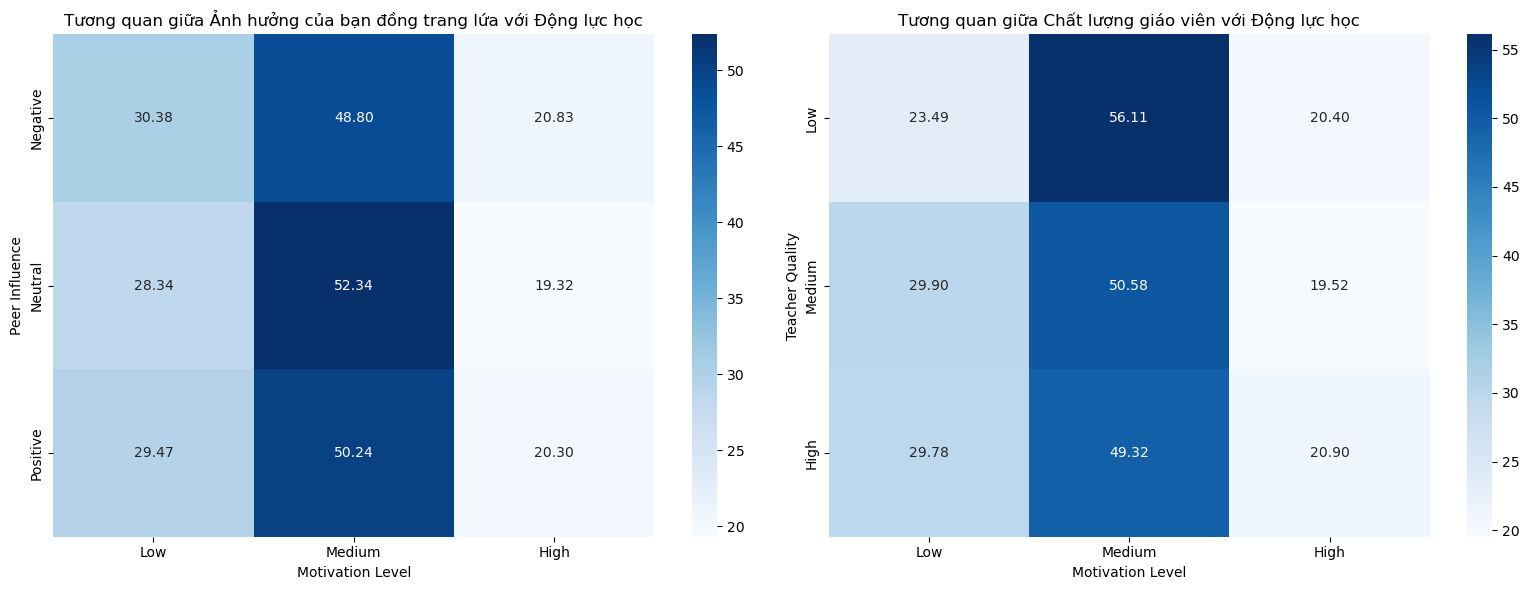

In [18]:
# Vẽ biều đồ heatmap cho từng tương quan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(peer_percentage_data, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title('Tương quan giữa Ảnh hưởng của bạn đồng trang lứa với Động lực học')
axes[0].set_ylabel('Peer Influence')
axes[0].set_xlabel('Motivation Level')

sns.heatmap(teacher_percentage_data, annot=True, fmt=".2f", cmap="Blues", ax=axes[1])
axes[1].set_title('Tương quan giữa Chất lượng giáo viên với Động lực học')
axes[1].set_ylabel('Teacher Quality')
axes[1].set_xlabel('Motivation Level')

plt.tight_layout()
plt.show()


- Nhận xét: 
    + Ở biểu đồ thứ nhất: Nhóm có động lực học "Medium" chiếm tỷ lệ cao nhất trên tổng thể dữ liệu. Ở các nhóm học sinh không có sự khác biệt đáng kể về động lực học theo ảnh hưởng từ bạn đồng trang lứa.

    + Ở biều đồ thứ hai: Cũng tương tự biều đồ thứ nhất. Tuy nhiên tỉ lệ động lực học thấp ở 2 nhóm học sinh học với giáo viên có chất lượng cao (29.78%) và trung bình (29.90%) lại cao hơn đáng kể so với nhóm học sinh học với giáo viên chất lượng thấp (23.49%).  

- Kết luận:
    + Động lực học của học sinh có chịu ảnh hưởng bởi yếu tố con người trong môi trường học tập. Tuy nhiên đây không phải là yếu tố duy nhất ảnh hưởng tới điều đó. Đa số học sinh có động lực học ở mức trung bình, mức động lực học cao chỉ nằm trong khoảng ~ 20% học sinh.

    + Ảnh hưởng của bạn đồng trang lứa: Có vẻ như ảnh hưởng của bạn đồng trang lứa có tác động nhất định tới mức độ động lực học, nhưng mức độ ảnh hưởng "Negative" và "Positive" không làm tăng hay giảm đáng kể động lực học lên mức "High". 

    + Chất lượng giáo viên: Chất lượng giáo viên có liên quan đến động lực học. Trong môi trường giáo viên chất lượng "Low", học sinh tự thúc đẩy để duy trì động lực ở mức trung bình nhưng ít đạt đến động lực học cao. Trong môi tường giáo viên có chất "Medium" và "High", vì một vài nguyên do nào đó mà dẫn tới việc tỉ lệ học sinh có động lực học thấp lại nhiều hơn. 
